In [40]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from PIL import Image

In [41]:
data_path = 'metadata.csv'
images_path = 'images'
path_anno = "annotations"

In [42]:
column_names = ['patientid','offset','sex','age','finding','survival','intubated','intubation_present','went_icu','in_icu','needed_supplemental_O2','extubated','temperature','pO2_saturation','leukocyte_count','neutrophil_count','lymphocyte_count','view','modality','date','location','folder','filename','doi','url','license','clinical_notes','other_notes']

In [43]:
len(column_names)

28

In [44]:
df = pd.read_csv(data_path, names=column_names, header=None, skiprows=[0], index_col=False)

In [45]:
df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,in_icu,...,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,...,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,...,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [46]:
df = df[['finding', 'view', 'modality', 'folder', 'filename']]\

In [47]:
df.head()

,finding,view,modality,folder,filename
0,COVID-19,PA,X-ray,images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,COVID-19,PA,X-ray,images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,COVID-19,PA,X-ray,images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,COVID-19,PA,X-ray,images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,COVID-19,PA,X-ray,images,nejmc2001573_f1a.jpeg


357


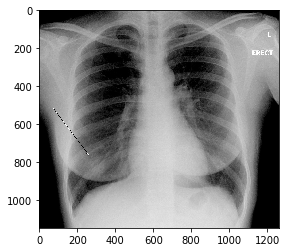

In [48]:
#images holds all the xray images 
imgs = os.listdir(images_path) # create a list of all the files inside the fodler
img_x = img_y = 50  # image size is constant
n_samples = np.size(imgs)
print(n_samples) 

images = np.array([np.array(Image.open(os.path.join(images_path,im)).convert("RGB")) for im in imgs],order='F', dtype='object')
plt.imshow(images[1])

